In [1]:
import pandas as pd
import numpy as np

In [2]:
! pip install mord

  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9885 sha256=36374d46dcf805aa4223164d46ae3505a33d96603695b27dd92866801d805bb8
  Stored in directory: /root/.cache/pip/wheels/d1/fc/57/f2a2ad4ed0491ab6d5bb8642a90f1da9469397641e914743da
Successfully built mord


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mord import OrdinalRidge
from sklearn.metrics import mean_squared_error, accuracy_score

In [4]:
url = "https://raw.githubusercontent.com/AnnaNebuko/ABD-PRJ-25-2team-HAPPINESS/main/data_cleaned.csv"
df = pd.read_csv(url)

In [6]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,idno,agea,rlgdgr,polintr,sclmeet,happy,cntry,nwspol,pplfair,health,...,actrolga,cptppola,trstprl,trstlgl,trstplc,trstplt,vote,stfeco,stfdem,stfedu
0,50030,21.0,0.0,2.0,7.0,9.0,AT,90.0,0.0,2.0,...,2.0,2.0,6.0,6.0,4.0,1.0,1.0,2.0,7.0,10.0
1,50057,53.0,8.0,2.0,4.0,9.0,AT,30.0,9.0,1.0,...,4.0,3.0,7.0,5.0,8.0,4.0,1.0,6.0,6.0,5.0
2,50106,78.0,6.0,3.0,6.0,7.0,AT,15.0,6.0,3.0,...,2.0,3.0,5.0,6.0,9.0,3.0,2.0,4.0,6.0,5.0
3,50145,64.0,1.0,2.0,5.0,9.0,AT,60.0,3.0,2.0,...,1.0,3.0,6.0,8.0,8.0,5.0,1.0,6.0,8.0,9.0
4,50158,59.0,3.0,2.0,6.0,8.0,AT,120.0,8.0,1.0,...,3.0,3.0,3.0,5.0,7.0,5.0,1.0,4.0,3.0,3.0


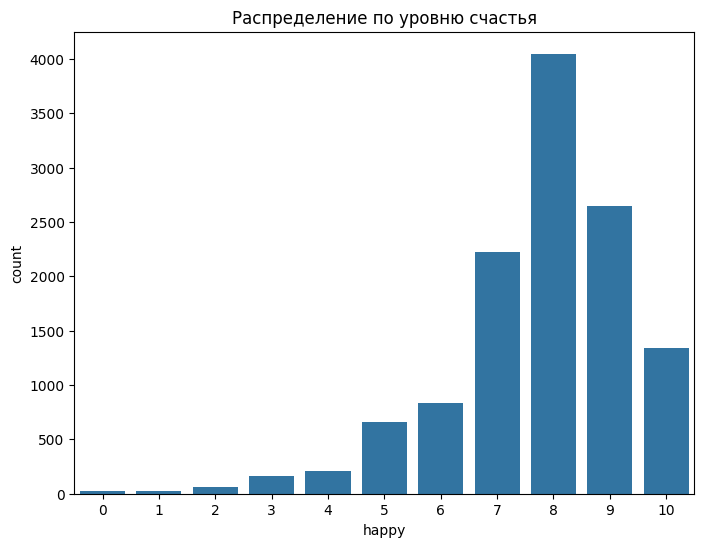

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='happy')
plt.title('Распределение по уровню счастья')
plt.show()

In [8]:
df['happy'] = df['happy'].astype(int)

X = df.drop('happy', axis=1)
y = df['happy']

In [9]:
# закодируем категориальные признаки
X = pd.get_dummies(X, columns=['cntry', 'gndr'], drop_first=True)

In [150]:
bins =  [0, 3, 5, 9, 10]
labels = ['Low', 'Medium', 'High', 'Very High']
df['happy_grouped'] = pd.cut(df['happy'], bins=bins, labels=labels, right=True)

df = df.dropna(subset=['happy_grouped']).copy()

print(df['happy_grouped'].value_counts())

happy_grouped
High         9759
Very High    1341
Medium        868
Low           229
Name: count, dtype: int64


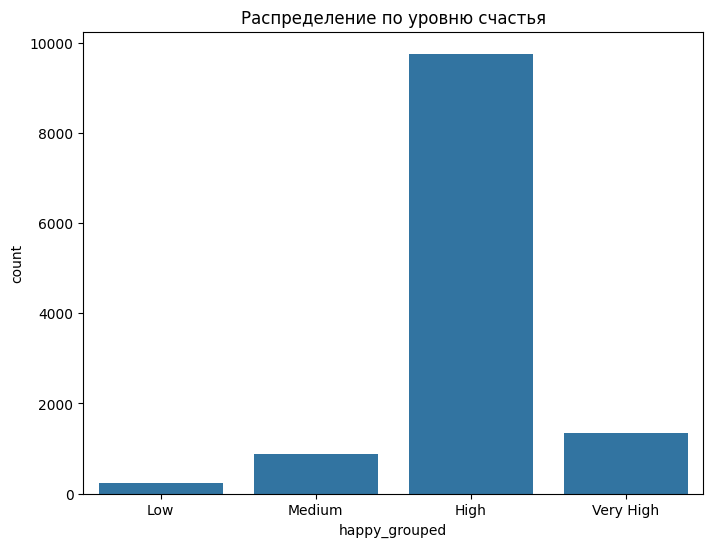

In [151]:
fig = plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='happy_grouped')
plt.title('Распределение по уровню счастья')
plt.show()

In [152]:
# Подготовка X и y
X = df.drop(['happy', 'happy_grouped'], axis=1)
y = df['happy_grouped']

# Преобразование y в категории с порядком
category_order = ['Low', 'Medium', 'High', 'Very High']
y = pd.Categorical(y, categories=category_order, ordered=True).codes  # 0=Low, 1=Medium, 2=High

# Кодирование категориальных предикторов и стандартизация
X = pd.get_dummies(X, columns=['cntry', 'gndr'], drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [153]:
# Модель
model_ordinal = LogisticAT(alpha=0)  # alpha=0 — нет регуляризации
model_ordinal.fit(X_train, y_train)

# Предсказание и метрики
y_pred_ordinal = model_ordinal.predict(X_test)
mse_ordinal = mean_squared_error(y_test, y_pred_ordinal)
accuracy_ordinal = accuracy_score(y_test, y_pred_ordinal)

print("Порядковая регрессия:")
print(f"MSE: {mse_ordinal:.3f}")
print(f"Accuracy: {accuracy_ordinal:.2f}")

# Важность предикторов
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_ordinal.coef_
}).sort_values('Coefficient', ascending=False)

print(coef_df.head(100))

Порядковая регрессия:
MSE: 0.236
Accuracy: 0.80
     Feature  Coefficient
18     enjlf     0.723894
40    stfeco     0.220655
8    atchctr     0.219077
47  cntry_ES     0.197417
46  cntry_DE     0.166316
37   trstplc     0.103274
6    pplfair     0.098627
26   weighta     0.095809
24   alcfreq     0.094481
2     rlgdgr     0.089982
12     hhmmb     0.084507
50  cntry_GB     0.079976
1       agea     0.075445
36   trstlgl     0.072736
3    polintr     0.070127
42    stfedu     0.064459
28   cnfpplh     0.058140
34  cptppola     0.057147
17  ipsucesa     0.056399
4    sclmeet     0.027812
41    stfdem     0.024006
38   trstplt     0.020316
44  cntry_CH     0.015169
22    dosprt     0.015054
29    paccnt     0.015031
0       idno     0.003913
10   dscrgrp    -0.010989
27   fnsdfml    -0.012077
33  actrolga    -0.013905
15  impsafea    -0.015136
43  cntry_BE    -0.018762
30   emplrel    -0.021122
13  impdiffa    -0.021209
11      pray    -0.036500
5     nwspol    -0.037083
32    uempla    

In [155]:
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
import pandas as pd

import numpy as np

# Модель XGBoost для 4 классов
model_xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    n_estimators=100,
    random_state=42,
    eval_metric='mlogloss',
    use_label_encoder=False
)

# Обучение модели
model_xgb.fit(X_train, y_train)

# Предсказание и метрики
y_pred_xgb = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("\nXGBoost (4 класса):")
print(f"MSE: {mse_xgb:.3f}")
print(f"Accuracy: {accuracy_xgb:.3f}")

# Важность предикторов (gain-based)
importance_xgb = pd.DataFrame({
    "Предиктор": X.columns,
    "Важность (gain)": model_xgb.feature_importances_
}).sort_values("Важность (gain)", ascending=False)
print("\nВажность предикторов (XGBoost):")
print(importance_xgb)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:55:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost (4 класса):
MSE: 0.242
Accuracy: 0.802

Важность предикторов (XGBoost):
   Предиктор  Важность (gain)
18     enjlf         0.097309
19    fltdpr         0.044755
51  cntry_GR         0.035456
20    fltlnl         0.030542
43  cntry_BE         0.026692
40    stfeco         0.024193
32    uempla         0.023988
36   trstlgl         0.023474
8    atchctr         0.022554
49  cntry_FR         0.021249
37   trstplc         0.020964
31   hincfel         0.020518
47  cntry_ES         0.020261
50  cntry_GB         0.019677
6    pplfair         0.019640
7     health         0.019256
46  cntry_DE         0.018115
38   trstplt         0.017403
9    aesfdrk         0.017263
41    stfdem         0.016685
16  iphlppla         0.016683
12     hhmmb         0.016178
45  cntry_CY         0.015622
42    stfedu         0.015537
48  cntry_FI         0.015401
34  cptppola         0.015214
4    sclmeet         0.015012
52    gndr_1         0.014778
3    polintr         0.014696
28   cnfpplh       

# Если 3 класса

In [157]:
bins =  [-1, 3, 7, 10]
labels = ['Low', 'Medium', 'High']
df['happy_grouped'] = pd.cut(df['happy'], bins=bins, labels=labels, right=True)
df = df.dropna(subset=['happy_grouped']).copy()
print(df['happy_grouped'].value_counts())
# Подготовка X и y
X = df.drop(['happy', 'happy_grouped'], axis=1)
y = df['happy_grouped']
# Преобразование y в категории с порядком
category_order = ['Low', 'Medium', 'High']
y = pd.Categorical(y, categories=category_order, ordered=True).codes  # 0=Low, 1=Medium, 2=High
# Кодирование категориальных предикторов и стандартизация
X = pd.get_dummies(X, columns=['cntry', 'gndr'], drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

from xgboost import XGBClassifier

# Модель XGBoost
model_xgb = XGBClassifier(
    objective='multi:softmax',  # для многоклассовой классификации
    num_class=3,               # количество классов
    n_estimators=100,
    random_state=42,
    eval_metric='mlogloss'     # метрика для многоклассовой задачи
)
model_xgb.fit(X_train, y_train)

# Предсказание и метрики
y_pred_xgb = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("\nXGBoost:")
print(f"MSE: {mse_xgb:.3f}")
print(f"Accuracy: {accuracy_xgb:.3f}")

# Важность предикторов (gain-based)
importance_xgb = pd.DataFrame({
    "Предиктор": X.columns,
    "Важность (gain)": model_xgb.feature_importances_
}).sort_values("Важность (gain)", ascending=False)
print("\nВажность предикторов (XGBoost):")
print(importance_xgb)

happy_grouped
High      8040
Medium    3928
Low        229
Name: count, dtype: int64

XGBoost:
MSE: 0.253
Accuracy: 0.756

Важность предикторов (XGBoost):
   Предиктор  Важность (gain)
18     enjlf         0.100434
19    fltdpr         0.049910
20    fltlnl         0.046047
51  cntry_GR         0.040925
40    stfeco         0.040491
49  cntry_FR         0.028166
31   hincfel         0.025599
37   trstplc         0.022883
45  cntry_CY         0.022375
7     health         0.021901
8    atchctr         0.020071
42    stfedu         0.018986
46  cntry_DE         0.018812
6    pplfair         0.018492
16  iphlppla         0.017603
47  cntry_ES         0.017002
48  cntry_FI         0.016775
52    gndr_1         0.016749
12     hhmmb         0.016565
30   emplrel         0.015442
9    aesfdrk         0.014335
14   impfuna         0.013953
32    uempla         0.013913
21     slprl         0.013821
1       agea         0.013777
50  cntry_GB         0.013646
2     rlgdgr         0.013477
23   